# Linear Regression
Using the dataset [Advertisement.csv](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv), we seek to find a linear relation between sales and the money spent on three different media of advertisement

In [1]:
import pandas as pd
adver = pd.read_csv('Advertising.csv')

In [2]:
y = adver['sales']
adver.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Single feature linear regression
Restricting to each media, we fit 3 Simple Linear Regression models.

In [3]:
cols = list(adver)

from sklearn.linear_model import LinearRegression

xtv = adver.drop(cols[:1]+cols[2:],1)
regtv = LinearRegression().fit(xtv,y)

xr = adver.drop(cols[:2]+cols[3:], 1)
regr = LinearRegression().fit(xr,y)

xnp =  adver.drop(cols[:3]+cols[4:], 1)
regnp = LinearRegression().fit(xnp,y)

In [4]:
from matplotlib import pyplot as plt
plt.scatter(xtv,y,color = 'g')
plt.plot(xtv,regtv.predict(xtv),color = 'k')
print('R-squared coeff for TV = ',regtv.score(xtv,y))

R-squared coeff for TV =  0.611875050850071


R-squared coeff for Radio =  0.33203245544529525


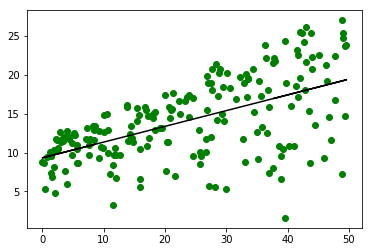

In [5]:
plt.scatter(xr,y, color = 'g')
plt.plot(xr,regr.predict(xr),color = 'k')
print('R-squared coeff for Radio = ',regr.score(xr,y))

R-squared coeff for Newspaper =  0.05212044544430516


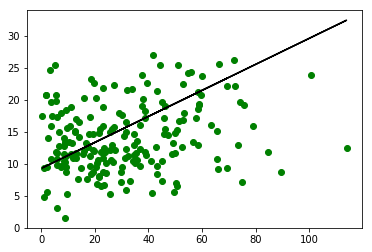

In [6]:
plt.scatter(xnp,y, color = 'g')
plt.plot(xnp,regr.predict(xnp),color = 'k')
print('R-squared coeff for Newspaper = ',regnp.score(xnp,y))

## Multiple Variable Linear Regression
We now fit a model with all three features.

In [19]:
x = adver.drop(cols[:1]+cols[4:],1)
reg = LinearRegression().fit(x,y)
print('R-squared coeff for full model = ',reg.score(x,y))
print("Coeff are",reg.coef_)

R-squared coeff for full model =  0.8972106381789521
Coeff are [ 0.04576465  0.18853002 -0.00103749]


In [18]:
x[0:5]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Adding interaction terms
Sometimes the weight assigned to a feature might be a linear function of some other feature itself. We handle such cases by adding the product of two features as another feature.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only = True)
x1 = poly.fit_transform(x)
x1[:5]

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
        8.697780e+03, 1.592292e+04, 2.615760e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 4.510000e+01,
        1.748850e+03, 2.006950e+03, 1.772430e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 6.930000e+01,
        7.894800e+02, 1.191960e+03, 3.180870e+03],
       [1.000000e+00, 1.515000e+02, 4.130000e+01, 5.850000e+01,
        6.256950e+03, 8.862750e+03, 2.416050e+03],
       [1.000000e+00, 1.808000e+02, 1.080000e+01, 5.840000e+01,
        1.952640e+03, 1.055872e+04, 6.307200e+02]])

In [21]:
regex = LinearRegression().fit(x1,y)
print('R-squared coeff for new model = ',regex.score(x1,y))
print(regex.coef_,regex.intercept_)

R-squared coeff for new model =  0.9686311066255571
[ 0.00000000e+00  2.03270962e-02  2.29291894e-02  1.70339370e-02
  1.13928001e-03 -7.97143541e-05 -1.09597607e-04] 6.460158489941912


Thus, 0.96 of the total variation can be explained by the 3 features and their interaction terms. We may drop the 2  interaction terms with coefs of size 0.0001 and less. 

In [28]:
x2 = x1[:,:5]
regnew = LinearRegression().fit(x2,y)
print('R-squared coeff for new model = ',regnew.score(x2,y))
print(regnew.coef_,regnew.intercept_)

R-squared coeff for new model =  0.9678222434748514
[0.         0.01906682 0.02799166 0.00144424 0.00108733] 6.7284119473417965


### sales = 6.72 + 0.019 * x_tv + 0.028 * x_radio + 0.00144 * x_news +  0.001 * x_tv* x_radio